# Estudo sobre análise de dados exploratória - EDA

- Fonte de dados: [consumidor.gov.br](https://www.consumidor.gov.br/pages/principal/?1589037000187)
- Para análise: [Indicadores](https://www.consumidor.gov.br/pages/dadosabertos/externo/)


In [505]:
import pandas as pd
%matplotlib inline
%pylab inline

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [506]:
data = './data/2020-04.csv'

dataset = pd.read_csv(data,sep=';',encoding='latin1')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89779 entries, 0 to 89778
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Região                  89779 non-null  object 
 1   UF                      89779 non-null  object 
 2   Cidade                  89779 non-null  object 
 3   Sexo                    89779 non-null  object 
 4   Faixa Etária            89779 non-null  object 
 5   Data Finalização        89779 non-null  object 
 6   Tempo Resposta          89008 non-null  float64
 7   Nome Fantasia           89779 non-null  object 
 8   Segmento de Mercado     89779 non-null  object 
 9   Área                    89779 non-null  object 
 10  Assunto                 89779 non-null  object 
 11  Grupo Problema          89779 non-null  object 
 12  Problema                89779 non-null  object 
 13  Como Comprou Contratou  89779 non-null  object 
 14  Procurou Empresa        89779 non-null

In [ ]:
dataset.columns

In [ ]:
dataset.head()

## Hipóteses

### Existe uma predominância de sexo nas reclamações?

In [ ]:
slices = dataset[u'Sexo'].value_counts()
slices

In [ ]:
_, sex = plt.subplots()
sex.pie(
    slices, 
    explode=(0, 0.009), 
    labels=['Masculino', 'Feminino'], 
    autopct='%1.1f%%\n',
    startangle=90,
)
sex.axis('equal')
plt.show()

### Das reclamações, qual quantitativo das avaliações?

In [ ]:
dataset[u'Avaliação Reclamação'].value_counts()
# dataset.groupby(u'Sexo')[u'Avaliação Reclamação'].value_counts()
# dataset.groupby(u'Avaliação Reclamação').mean()
# dataset[u'Avaliação Reclamação'].array.unique()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

data = dataset[u'Avaliação Reclamação'].value_counts()
labels = dataset[u'Avaliação Reclamação'].array.unique()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(
    data, 
    autopct=lambda pct: func(pct, data),
    textprops=dict(color="w")
)

ax.legend(
    wedges, 
    labels,
    title="Avaliações",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Quantitativo das avaliações")

plt.show()

### Qual a faixa etária média dos consumidores?

In [ ]:
dataset.groupby(u'Sexo')[u'Faixa Etária'].value_counts()

### Qual o grupo de problema mais comum?

In [ ]:
dataset[u'Grupo Problema'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

data = dataset[u'Grupo Problema'].value_counts()
labels = dataset[u'Grupo Problema'].array.unique()


def legend(percent, all_values):
    absolute = int(percent/100.*np.sum(all_values))
    return f"{absolute:d} ({percent:.1f}%)"


wedges, texts, autotexts = ax.pie(
    data, 
    autopct=lambda percent: legend(percent, data),
    textprops=dict(color="w")
)

ax.legend(
    wedges, 
    labels,
    title="Problema",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Por grupo de problemas")

plt.show()

### Qual o segmento de mercado mais afetado?

In [ ]:
is_cobranca_contestacao = dataset[u'Grupo Problema'] == u'Cobrança / Contestação'
segmento = dataset[is_cobranca_contestacao]
segmento['Segmento de Mercado'].value_counts()

In [ ]:
nome_fantasia = segmento[u'Nome Fantasia']

fig, ax = plt.subplots()

y_pos = np.arange(len(nome_fantasia.value_counts()[:20]))
values = nome_fantasia.value_counts()[:20]
segmentos = nome_fantasia.unique()[:20]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()

ax.set_xlabel('Reclamações')
ax.set_title('Rank de Empresas')
ax.grid()

fig.set_size_inches(18.5, 10.5, forward=False)
plt.rcParams.update({'font.size': 15})

plt.show()

### Existe alguma correlação entre o tempo de resposta e a nota do consumidor?


Para tentar validar essa suposição, utilizar o Coeficiente de Correlação de Pearson.

A técnica basicamente mede o grau de correlação e sua direção entre duas variáveis de escala métrica.

O coeficiente assume valores entre -1  e 1 onde o valor 1 indica uma correlação perfeitamente positiva entre as duas variáveis, -1 indica uma correlação perfeitamente negativa e o valor 0 representa que não existe correlação linear entre as variáveis.

Voltando para o nosso contexto, uma correlação negativa alta com valores entre -0.7 a -0.9 pode indicar que quanto menor o tempo de resposta maior a nota atribuída à empresa pelo consumidor.

Levando em consideração a existência de uma correlação negativa o valor do tempo de resposta deve diminuir e a nota do consumidor aumentar.

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))

corr_dataset = dataset

corr_dataset = corr_dataset.drop('Total',axis=1) # Exclui a coluna Total da base de dados

print(corr_dataset.median())

'''
Definindo a correlação entre as variáveis: 
 - O método corr do pandas faz o cálculo de correlação entre as variáveis numéricas em todo o dataframe.
'''
corr = corr_dataset.corr()

sns.heatmap(
    corr, 
    mask=np.zeros_like(corr, dtype=np.bool), 
    cmap=sns.diverging_palette(10, 10, as_cmap=True), 
    square=True, 
    ax=ax
)
print(corr)

### Qual a proporção de reclamações registradas e que não são resolvidas?

In [ ]:
# Separa e agrupa por segmento
x = dataset.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
reclamacoes = x[x > 20]

# Filtra novamente os dados especificando apenas os segmentos selecionados e armazenados em x
# isin() permite filtrar um atributo a apenas aos valores igual aos valores passados por parâmetro.
df = dataset[dataset[u'Segmento de Mercado'].isin(reclamacoes.keys())]

# Das reclamações, soma as não resolvidas
nao_resolvidas = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
reclamacoes_nao_resolvidas = nao_resolvidas.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

# Das reclamações, soma as resolvidas
resolvidas = df[df[u'Avaliação Reclamação']==u'Resolvida']
reclamacoes_resolvidas = resolvidas.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

# Das reclamações, soma as resolvidas
nao_avaliadas = df[df[u'Avaliação Reclamação']==u'Não Avaliada']
reclamacoes_nao_avaliadas = nao_avaliadas.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

In [ ]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

f, ax = plt.subplots(figsize=(8, 10))

sns.barplot(
    x=reclamacoes.values, 
    y=reclamacoes.keys(), 
    label="Total de reclamações", 
    color="b"
)


sns.barplot(
    x=reclamacoes_nao_avaliadas.values, 
    y=reclamacoes_nao_avaliadas.keys(),
    label="Não avaliadas", 
    color="#E7E84C"
)


# sns.barplot(
#     x=x1.values, 
#     y=x1.keys(),
#     label="Não resolvidas", 
#     color="#F25116"
# )

# sns.barplot(
#     x=x2.values, 
#     y=x2.keys(),
#     label="Resolvidas", 
#     color="#027368"
# )

ax.legend(ncol=2, loc="best", frameon=True)
ax.set(ylabel="", xlabel="Reclamações e suas situações")

sns.despine(left=False, bottom=True)

In [ ]:
# set width of bar
barWidth = 0.25
 
# set height of bar
# bars1 = [12, 30, 1, 8, 22]
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
 
# # Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot

plt.bar(x.values, x.keys(), color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(x1.values, x1.keys(), color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(x2.values, x2.keys(), color='#7f6d5f', width=barWidth, edgecolor='white', label='var2')
plt.bar(x3.values, x3.keys(), color='#7f6d5f', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x.keys()))], x.keys())
 
# Create legend & Show graphic
plt.legend()
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


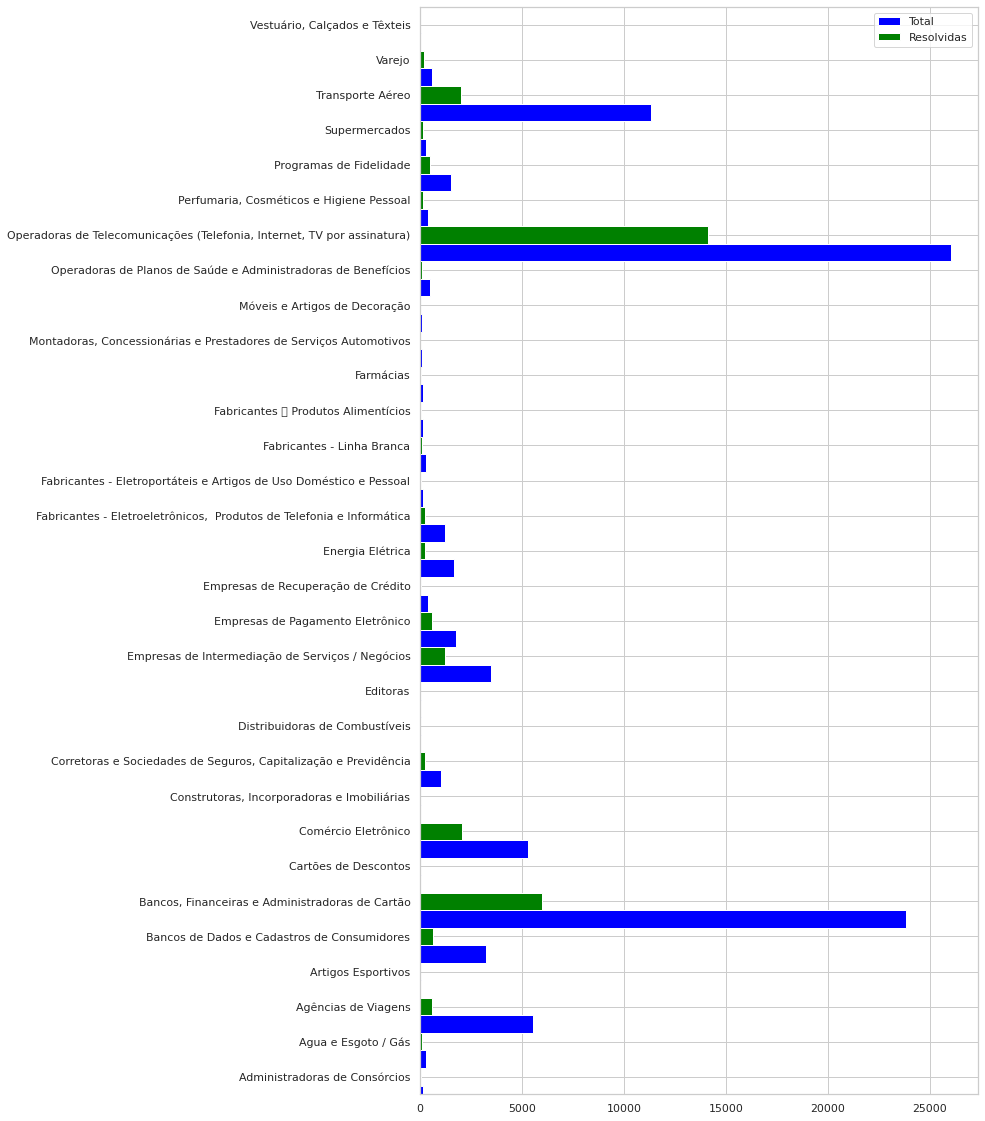

In [552]:
# index = reclamacoes.keys()

# df = pd.DataFrame({
#         'total': reclamacoes.values,
#         'resolvidas': reclamacoes_resolvidas.values,
#         'nao_resolvidas': reclamacoes_nao_resolvidas.values,
#         'nao_avaliadas': reclamacoes_nao_avaliadas.values,
#     }, 
#     index=index
# )



# df.plot.barh()

##########################################################################################################

index = reclamacoes.keys()

df = pd.DataFrame(
    dict(
        graph=reclamacoes.keys(),
        total=reclamacoes.values,
        resolvidas=reclamacoes_resolvidas.values,
        nao_resolvidas=reclamacoes_nao_resolvidas.values,
        nao_avaliadas=reclamacoes_nao_avaliadas.values,
    )
) 

# df = pd.DataFrame({
#         'total': reclamacoes.values,
#         'resolvidas': reclamacoes_resolvidas.values,
#         'nao_resolvidas': reclamacoes_nao_resolvidas.values,
#         'nao_avaliadas': reclamacoes_nao_avaliadas.values,
#     }, 
#     index=index
# )

ind = np.arange(len(df))
heigth = 0.5

fig, ax = plt.subplots(
    figsize=(10, 20)
)

print(ind ,ind + (heigth * 2))

ax.barh(ind, df.total, heigth, color='blue', label='Total')
ax.barh(ind + heigth, df.resolvidas, heigth, color='green', label='Resolvidas')
# ax.barh(ind + (heigth * 2), df.nao_resolvidas, heigth, color='red', label='Não Resolvidas')
# ax.barh(ind + (heigth * 2), df.nao_avaliadas, heigth, color='yellow', label='Não Avaliadas')

ax.set(
    yticks=ind + heigth, 
    yticklabels=df.graph, 
    ylim=[2*heigth - 1, len(df)]
)
ax.legend()

plt.show()

### As reclamações são distribuídas em todo Brasil, ou existe uma maior concentração em determinadas regiões?

In [555]:
municipios = pd.read_excel('./data/brasil_municipios.xls', encoding='latin1')
municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5509 non-null   int64  
 1   LATITUDE   5509 non-null   object 
 2   LONGITUDE  5509 non-null   float64
 3   Mun/UF     5509 non-null   object 
 4   MUNICIPIO  5509 non-null   object 
 5   UF         5509 non-null   object 
 6   Valor      5509 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 301.4+ KB


In [557]:
municipios.head()

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,1,LATITUDE,-66.88,Mun/UF,ACRELANDIA,AC,39560.038911
1,2,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17842.150989
2,3,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,93373.394313
3,4,-9.83,-67.95,BUJARI - AC,BUJARI,AC,28516.567493
4,5,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18886.455136


In [561]:
municipios.UF.value_counts()

MG    853
SP    645
RS    469
BA    415
PR    399
SC    293
GO    242
PB    223
PI    221
MA    217
PE    185
CE    184
RN    166
PA    143
TO    139
MT    126
AL    101
RJ     91
ES     77
MS     77
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: UF, dtype: int64

In [564]:
import unicodedata
import re

def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavra_sem_acento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    palavra_sem_acento = re.sub('[^a-zA-Z0-9 \\\]', '', palavra_sem_acento)
    palavra_sem_acento = str(palavra_sem_acento).upper()
    return palavra_sem_acento

dataset['Cidade2'] = dataset['Cidade'].apply(remover_acentos)

dataset['Cidade2']

0          JUNDIAI
1          ITAGUAI
2         BRASILIA
3         TERESINA
4         BRASILIA
           ...    
89774    SAO PAULO
89775    SAO PAULO
89776    SAO PAULO
89777       SUZANO
89778    SAO PAULO
Name: Cidade2, Length: 89779, dtype: object

In [ ]:
import folium
from folium import plugins

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
coordenadas=[]

for cid,uf in zip(dataset.Cidade2[:20000],dataset.UF[:20000]):
    cidadeUf = cid+' - '+uf
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    
    if lat != '' and long != '':
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
    
        coordenadas.append([lat,long])
    
    mapa.add_child(plugins.HeatMap(coordenadas))

mapa